In [1]:
import os
import re
from typing import List, Optional

import click
import dnnlib
import numpy as np
import PIL.Image
import torch

import legacy
import pickle
import copy

## Variable selection

In [2]:
network_pkl_for_blending = './models/transferred_Webtoon.pkl'
myseed = 108

In [3]:
class_idx = None
truncation_psi = 0.7
device = torch.device('cuda')

In [5]:
network_pkl = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/transfer-learning-source-nets/ffhq-res256-mirror-paper256-noaug.pkl'
with dnnlib.util.open_url(network_pkl) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)
    
network_pkl_for_blending = './models/transferred_Webtoon.pkl'
with open(network_pkl_for_blending,'rb') as f:
    G2 = pickle.load(f)

In [6]:
Gtemp = copy.deepcopy(G)

G.synthesis.b64 = G2.synthesis.b64
G.synthesis.b128 = G2.synthesis.b128
G.synthesis.b256 = G2.synthesis.b256

In [7]:
myz = torch.from_numpy(np.random.RandomState(myseed).randn(1, G.z_dim)).to(device)
print(myz.shape)

torch.Size([1, 512])


In [8]:
label = torch.zeros([1, G.c_dim], device=device)
if G.c_dim != 0:
    if class_idx is None:
        ctx.fail('Must specify class label with --class when using a conditional network')
    label[:, class_idx] = 1
else:
    if class_idx is not None:
        print ('warn: --class=lbl ignored when running on an unconditional network')

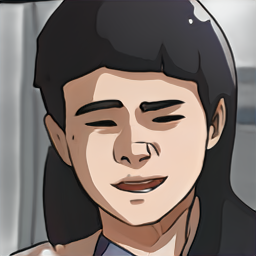

In [9]:
img = G2(myz, label, truncation_psi=truncation_psi)
img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

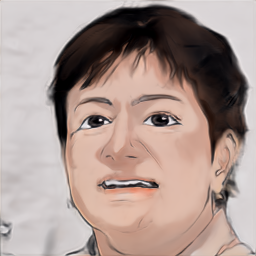

In [10]:
img = G(myz, label, truncation_psi=truncation_psi)
img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

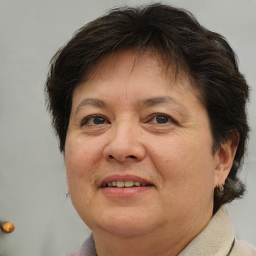

In [11]:
img = Gtemp(myz, label, truncation_psi=truncation_psi)
img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')